# Week8 - Homework KNN-NB-SVM

- Use GridSearchCV on X_train dataset
    - KNN, NB, SVM, Logistic Regression, Decision Trees
- Test on X_test dataset

In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
X_train_full = pd.read_csv('https://github.com/msaricaumbc/DS_data/raw/master/ds602/movie/X_train.csv')
y_train_full = pd.read_csv('https://github.com/msaricaumbc/DS_data/raw/master/ds602/movie/y_train.csv')

X_test_full = pd.read_csv('https://github.com/msaricaumbc/DS_data/raw/master/ds602/movie/X_final.csv')
y_test_full = pd.read_csv('https://github.com/msaricaumbc/DS_data/raw/master/ds602/movie/y_final.csv')


# EDA

In [22]:
print("X_train shape:", X_train_full.shape)
print("y_train shape:", y_train_full.shape)
print("X_test shape:", X_test_full.shape)
print("y_test shape:", y_test_full.shape)

print("\nSample of X_train:")
print(X_train_full.head())

print("\nSample of y_train:")
print(y_train_full.head())


X_train shape: (40000, 1)
y_train shape: (40000, 1)
X_test shape: (10000, 1)
y_test shape: (10000, 1)

Sample of X_train:
                                              review
0  Shame, is a Swedish film in Swedish with Engli...
1  I know it's rather unfair to comment on a movi...
2  "Bread" very sharply skewers the conventions o...
3  After reading tons of good reviews about this ...
4  During the Civil war a wounded union soldier h...

Sample of y_train:
   sentiment
0          1
1          0
2          1
3          1
4          1


In [23]:
# Checking for missing values
print("Missing values in X_train:", X_train_full.isnull().sum())
print("Missing values in y_train:", y_train_full.isnull().sum())


Missing values in X_train: review    0
dtype: int64
Missing values in y_train: sentiment    0
dtype: int64


In [24]:
print("Summary statistics of X_train:")
print(X_train_full.describe())


Summary statistics of X_train:
                                                   review
count                                               40000
unique                                              39719
top     Loved today's show!!! It was a variety and not...
freq                                                    5


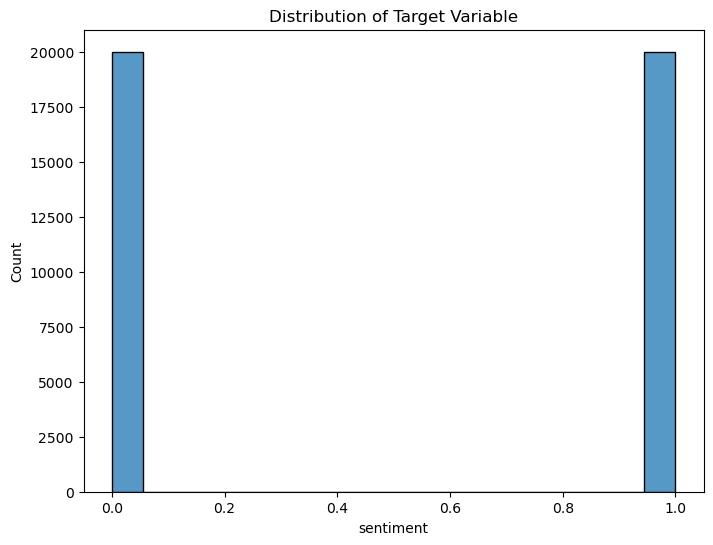

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

#Histogram of target variable y_train
plt.figure(figsize=(8, 6))
sns.histplot(data=y_train_full, x='sentiment')
plt.title('Distribution of Target Variable')
plt.show()


# Train - Test


Sampling the data for the sake of Gridsearch CV.

In [9]:
X_train = X_train_full[['review']].sample(frac=0.1, random_state=42)  # Sample and retain DataFrame structure
y_train = y_train_full.loc[X_train_sampled.index]

X_test = X_test_full[['review']].sample(frac=0.1, random_state=42)  # Sample and retain DataFrame structure
y_test = y_test_full.loc[X_test_sampled.index]


In [10]:
X_train

,review
32823,I am not sure why I like Dolph Lundgren. I gue...
16298,"A wonderful film, filled with great understate..."
28505,Investigative reporter Darren McGavin (as Carl...
6689,"Now, I flicked onto this just out of curiosity..."
26893,"First, let me mention the fact that, in spite ..."
...,...
19536,"""The Gay Desperado"" is wonderful throughout. T..."
13332,"Like so many other reviewers on here, my memor..."
18523,Great movie. I was laughing all time through. ...
14835,This movie sucks so bad. Its funny to see what...


# Function for Train and Evaluation

In [14]:
def train_and_evaluate_model(pipeline, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train['review'], y_train.values.ravel())
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test['review'])
    accuracy = accuracy_score(y_test, y_pred)
    
    return best_model, accuracy

# Pipelines and Grid Parameters

In [19]:

models = [
    {
        'name': 'Naive Bayes',
        'pipeline': Pipeline([
            ('vectorizer', CountVectorizer(stop_words='english')),
            ('classifier', MultinomialNB())
        ]),
        'param_grid': {
            'vectorizer__max_features': [1000, 2000, 3000],
            'classifier__alpha': [0.1, 0.5, 1.0]
        }
    },
    {
        'name': 'Logistic Regression',
        'pipeline': Pipeline([
            ('vectorizer', CountVectorizer(stop_words='english')),
            ('scaler', StandardScaler(with_mean=False)),
            ('classifier', LogisticRegression(max_iter=1000))
        ]),
        'param_grid': {
            'vectorizer__max_features': [1000, 2000, 3000],
            'classifier__penalty': ['l2'],
            'classifier__C': [1, 10, 100]
        }
    },
    {
        'name': 'Decision Tree',
        'pipeline': Pipeline([
            ('vectorizer', CountVectorizer(stop_words='english')),
            ('classifier', DecisionTreeClassifier())
        ]),
        'param_grid': {
            'vectorizer__max_features': [1000, 2000, 3000],
            'classifier__max_depth': [None, 10, 20, 30],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4]
        }
    },
    {
        'name': 'K-Nearest Neighbors',
        'pipeline': Pipeline([
            ('vectorizer', CountVectorizer(stop_words='english')),
            ('scaler', StandardScaler(with_mean=False)),
            ('classifier', KNeighborsClassifier())
        ]),
        'param_grid': {
            'vectorizer__max_features': [1000, 2000, 3000],
            'classifier__n_neighbors': [3, 5, 7, 10],
            'classifier__weights': ['uniform', 'distance'],
            'classifier__p': [1, 2] 
        }
    },
    {
        'name': 'Support Vector Machine',
        'pipeline': Pipeline([
            ('vectorizer', CountVectorizer(stop_words='english')),
            ('scaler', StandardScaler(with_mean=False)),
            ('classifier', SVC())
        ]),
        'param_grid': {
            'vectorizer__max_features': [1000, 2000, 3000],
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf']
        }
    }
]


# Training 

In [20]:
results = []

for model_info in models:
    name = model_info['name']
    pipeline = model_info['pipeline']
    param_grid = model_info['param_grid']
    
    best_model, accuracy = train_and_evaluate_model(pipeline, param_grid, X_train_sampled, y_train_sampled, X_test_sampled, y_test_sampled)
    
    results.append({'model': name, 'best_model': best_model, 'accuracy': accuracy})


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

# Results

In [21]:
for result in results:
    print(f"Model: {result['model']}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Best Model: {result['best_model']}")
    print()


Model: Naive Bayes
Accuracy: 0.8300
Best Model: Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_features=3000, stop_words='english')),
                ('classifier', MultinomialNB())])

Model: Logistic Regression
Accuracy: 0.8050
Best Model: Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_features=3000, stop_words='english')),
                ('scaler', StandardScaler(with_mean=False)),
                ('classifier', LogisticRegression(C=1, max_iter=1000))])

Model: Decision Tree
Accuracy: 0.7160
Best Model: Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_features=1000, stop_words='english')),
                ('classifier',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=4,
                                        min_samples_split=10))])

Model: K-Nearest Neighbors
Accuracy: 0.5940
Best Model: Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_features=1000, stop_words='english')),
     

Based on the results the best performing model for me is Support Vector Machines. So I am training the same on entire dataset with the best parameters obtained using the gridsearchCV.

# SVM

In [28]:
svm_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(max_features=2000, stop_words='english')),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', SVC(C=1))
])

In [32]:
svm_pipeline.fit(X_train_full['review'], y_train_full['sentiment'].values.ravel())

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_features=2000, stop_words='english')),
                ('scaler', StandardScaler(with_mean=False)),
                ('classifier', SVC(C=1))])

In [38]:
y_pred = svm_pipeline.predict(X_test_full['review'])

In [41]:
X_pred = svm_pipeline.predict(X_train_full['review'])

In [42]:
train_accuracy = accuracy_score(y_train_full['sentiment'], X_pred)
print(f"Train Accuracy: {accuracy:.4f}")

test_accuracy = accuracy_score(y_test_full['sentiment'], y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Train Accuracy: 0.8662
Test Accuracy: 0.8662


In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test_full, y_pred)
recall = recall_score(y_test_full, y_pred)
f1 = f1_score(y_test_full, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Precision: 0.8430
Recall: 0.9000
F1-score: 0.8706


In [44]:
from sklearn.metrics import classification_report

report = classification_report(y_test_full, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      5000
           1       0.84      0.90      0.87      5000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



- The overall accuracy of 87% suggests that the model generalizes well on unseen data and effectively captures underlying patterns in the dataset
- The SVM model demonstrates a strong ability to classify instances with balanced performance across precision, recall, and F1-score